In [1]:
import numpy as np
import matplotlib.pyplot as plt
import curve
import conf_matrix

from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import f1_score, auc, precision_recall_curve, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier


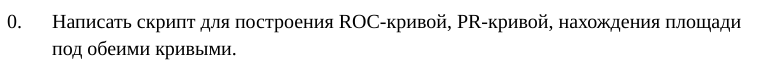

In [2]:
from IPython.display import Image
Image('task 0.png')

In [3]:
dset = datasets.load_breast_cancer()
X = dset.data
y = dset.target

print("%d objects"%(len(y)))
print("%d ones"%(np.sum(y)))
print("%d zeroes"%(len(y)-np.sum(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

569 objects
357 ones
212 zeroes


In [4]:
clf = KNeighborsClassifier(n_neighbors=20)
# clf=DecisionTreeClassifier(max_depth=5)

best_classifier = None
best_accuracy = None

kf = KFold(n_splits=5)
for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_split_train, y_split_train = X_train[train_index], y_train[train_index]
    X_split_valid, y_split_valid = X_train[val_index], y_train[val_index]

    clf_fold = clone(clf)
    classifier = clf_fold.fit(X_split_train, y_split_train)

    pred = classifier.predict(X_split_valid)
    accu = f1_score(y_split_valid, pred)

    if (best_accuracy is not None) and best_accuracy < accu:
        best_accuracy = accu
        best_classifier = classifier

    elif best_accuracy is None:
        best_accuracy = accu
        best_classifier = classifier

In [5]:
# conf_matrix.plot_mtx(X_test, y_test, best_classifier, dset.target_names)

In [6]:
probs = best_classifier.predict_proba(X_test)
p0 = probs[:, 0]
p1 = probs[:, 1]

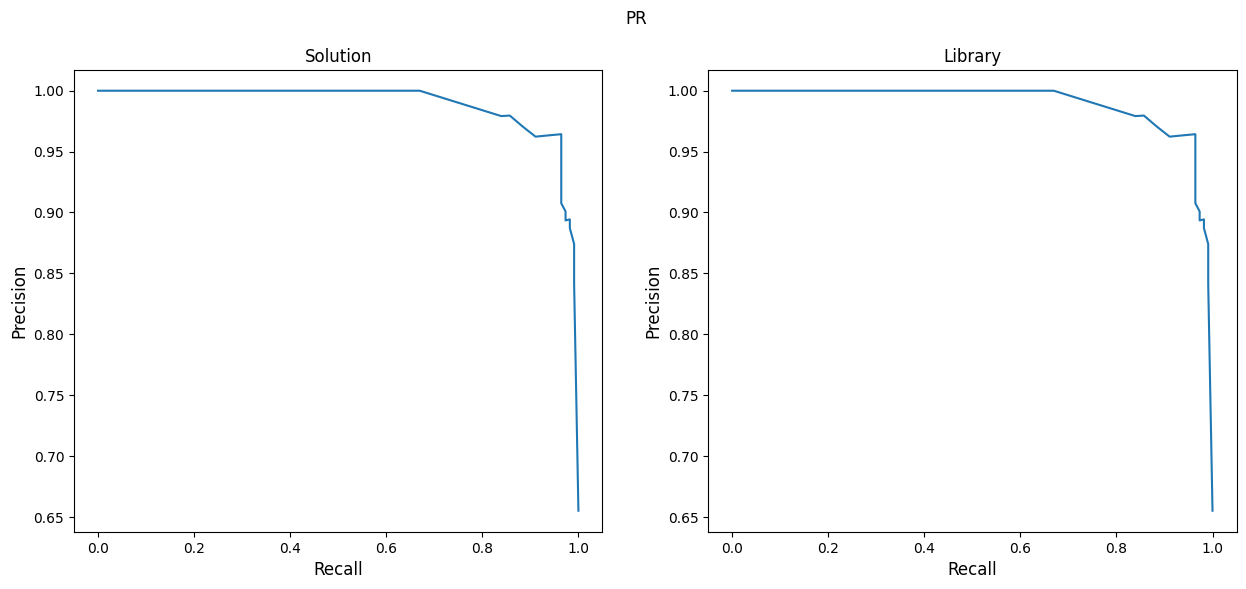

AUC: 0.9892116033
Lib AUC: 0.9892116033


In [7]:
prec, rec, thresholds = curve.precision_recall_curve(y_test, p1)
lib_prec, lib_rec, lib_thresholds = precision_recall_curve(y_test, p1)

fig = plt.figure(figsize=(15, 6))
fig.suptitle("PR", fontsize=12)
pr =  fig.add_subplot(121)
lib_pr =  fig.add_subplot(122)

curve.plot_curve(rec, prec, plot=pr, title="Solution", xlabel="Recall", ylabel="Precision")
curve.plot_curve(lib_rec , lib_prec, plot=lib_pr, title="Library", xlabel="Recall", ylabel="Precision")

plt.show()

print('AUC: %1.10f' % (auc(rec, prec)))
print('Lib AUC: %1.10f' % (auc(lib_rec, lib_prec)))

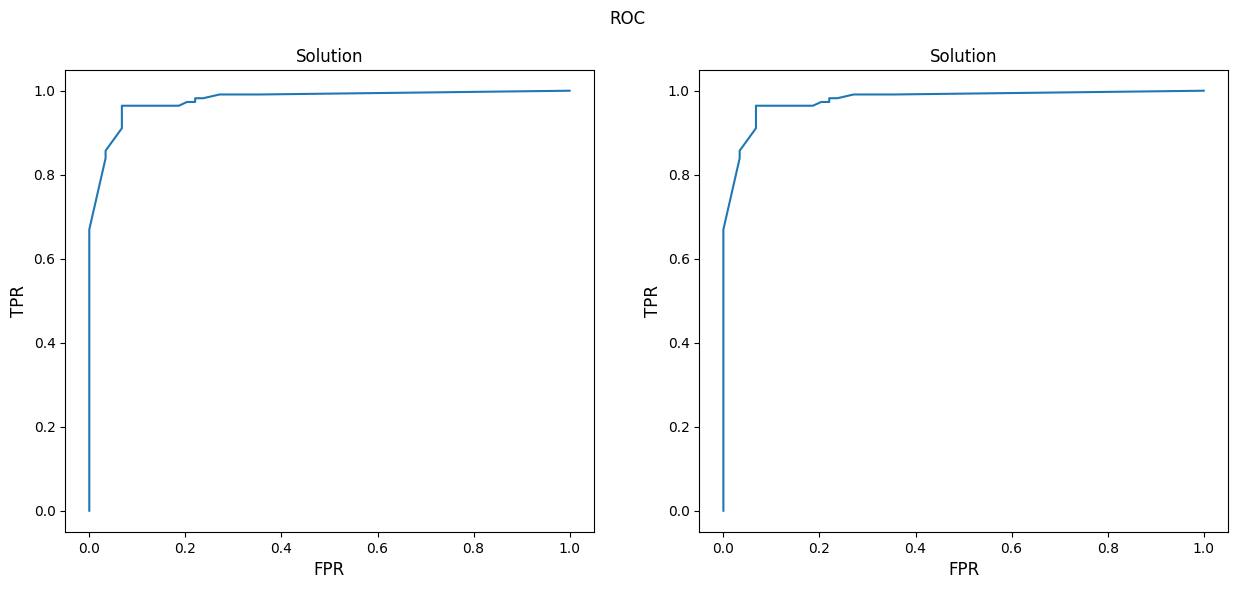

AUC: 0.9781325666
Lib AUC: 0.9781325666


In [8]:
fprs, tprs, thresholds = curve.roc_curve(y_test, p1)
lib_fprs, lib_tprs, lib_thresholds = roc_curve(y_test, p1)

fig = plt.figure(figsize=(15, 6))
fig.suptitle("ROC", fontsize=12)

roc =  fig.add_subplot(121)
curve.plot_curve(fprs, tprs, plot=roc, title="Solution", xlabel="FPR", ylabel="TPR")

lib_roc =  fig.add_subplot(122)
curve.plot_curve(lib_fprs, lib_tprs, plot=lib_roc, title="Solution", xlabel="FPR", ylabel="TPR")

plt.show()

print('AUC: %1.10f' % (auc(fprs, tprs)))
print('Lib AUC: %1.10f' % (auc(lib_fprs, lib_tprs)))

In [9]:
n = 100
y_rand = np.random.randint(2, size = n)
p1_rand = np.random.uniform(0.0, 1.0, size = n)

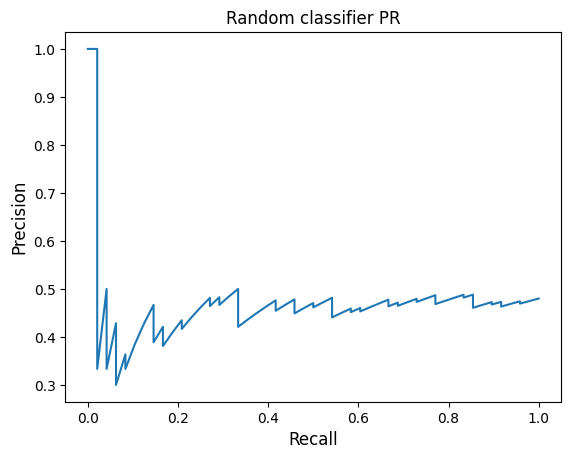

AUC: 0.464253


In [10]:
prec, rec, thresholds = curve.precision_recall_curve(y_rand, p1_rand)

curve.plot_curve(rec, prec, title="Random classifier PR", xlabel="Recall", ylabel="Precision")

print('AUC: %f' % (auc(rec, prec)))

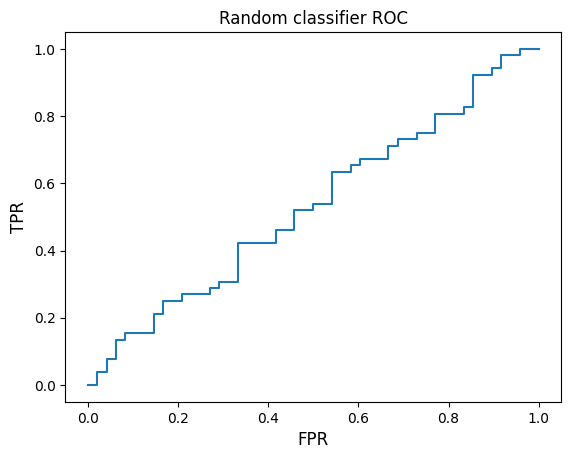

AUC: 0.530849


In [11]:
prec, rec, thresholds = curve.roc_curve(y_rand, p1_rand)

curve.plot_curve(rec, prec, title="Random classifier ROC", xlabel="FPR", ylabel="TPR")

print('AUC: %f' % (auc(rec, prec)))